# About Dataset

### Importing the Libraries

In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings. filterwarnings('ignore')

In [153]:
#Importing the dataset
red_df =  pd.read_csv("winequality-red.csv",delimiter = ';')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [154]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Exploratory Data Analysis

lets count the number of each quality in quality feature

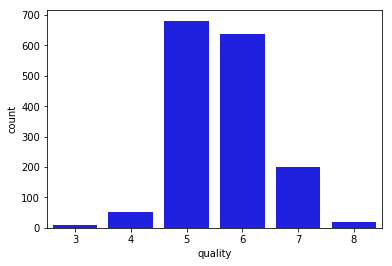

In [155]:
sns.countplot(red_df['quality'] , color = 'blue')

As we can see Most Number of wine has the Quality between 5-7 

In [156]:
red_df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Let's transform the quality feature in two Classes 
1. 0-5 as Bad
2. 6-10 as Good

In [157]:
bins = [0,5.5,10]
groups = ['Bad','Good']
red_df['quality'] = pd.cut(red_df['quality'] , bins = bins, labels = groups)

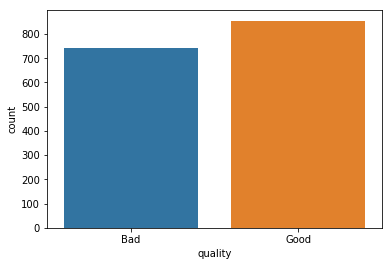

In [158]:
sns.countplot(red_df['quality'])

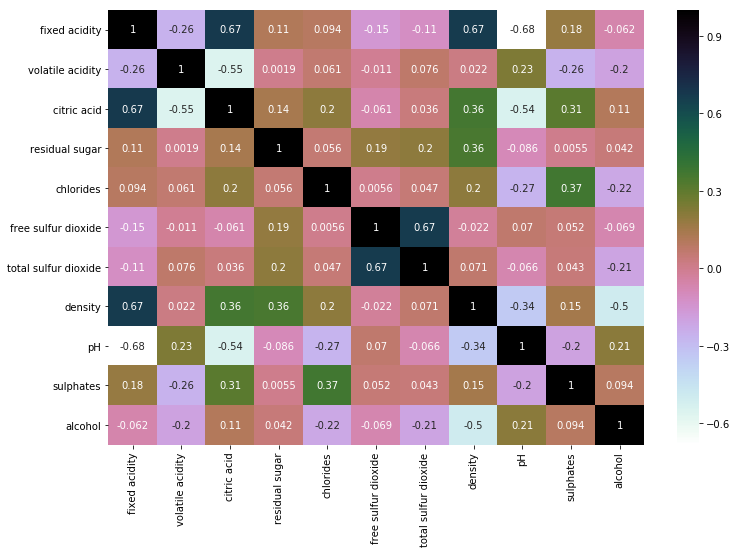

In [159]:
plt.figure(figsize = (12 , 8))
sns.heatmap(red_df.corr(),annot=True,cmap='cubehelix_r')

As we can see there is no stronger Correlation between the Independent Variable

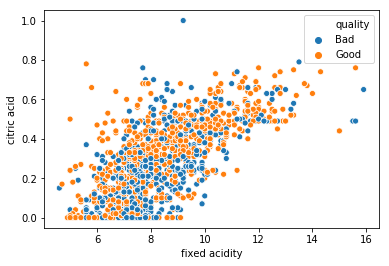

In [160]:
sns.scatterplot(red_df['fixed acidity'] , red_df['citric acid'] , hue = red_df['quality'])

1. With the increase in citric acid and fixed acidity the number of good wine increases 

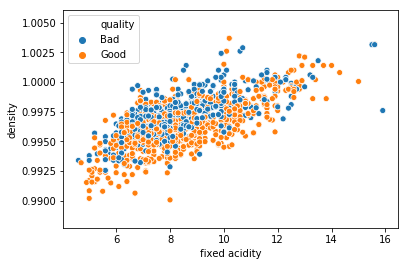

In [161]:
sns.scatterplot(red_df['fixed acidity'] , red_df['density'] , hue = red_df['quality'])

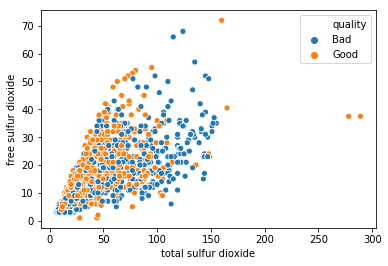

In [162]:
sns.scatterplot(red_df['total sulfur dioxide'] , red_df['free sulfur dioxide'] , hue = red_df['quality'])

with the increase in total sulphur dioxide no of bad wine increases

### Data preprocessing 

let's Convert quality categorical variable into Dummy Variable to get better result

In [163]:
red_df['quality'].replace(to_replace = ['Bad' , 'Good'] , value = [0,1] , inplace = True)

In [164]:
red_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0


Now In quality feature
1. 'Bad' Class is replaced with ' 0 '
2. 'Good' Class is replaced with ' 1 '

Now let's create Matrix of Features X and vector of feature y

In [165]:
X = red_df.loc[:,: 'quality'].values
y = red_df.loc[: , 'quality'].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  0.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  0.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  0.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  1.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  0.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  1.   ]])

In [166]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

Now let's Standardize our data to bring each row on same scale

In [167]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
X

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -1.07200445],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -1.07200445],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -1.07200445],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.93283195],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -1.07200445],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.93283195]])

let's devide the dataset into training set and test set

In [168]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25  , random_state = 0)

### Applying Kernel PCA Feature Extraction method

In [169]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components = 2,kernel = 'rbf' )
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

###  Modeling

Support Vector Machine

In [179]:
from sklearn.svm import SVC
supportclassifier = SVC(C =3 , gamma = 0.8 , kernel = 'rbf' , decision_function_shape = 'ovo')
supportclassifier.fit(X_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.8, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

predicting the test set values 

In [180]:
y_pred = supportclassifier.predict(X_test)

In [181]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = supportclassifier , X = X_train , y = y_train , cv = 10 )
accuracies.mean()*100

89.65896358543418

In [182]:
accuracies.std()*100

1.8285708332045094

the mean accuracy and variance are 89.65% and 1.82% 

### Improving the Model Performance 

Appying the Grid SearchCV to find optimal value for the hyperparameter of Support Vector Machine Classifier 

In [174]:
params = [{'kernel':['linear'] , 'C' :  [1,2,3,4,5,6,7] ,
           'gamma':[0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7 , 0.8] ,'decision_function_shape' : ['ovo' , 'ovr']},
           {'kernel':['rbf'] , 'C' :  [1,2,3,4,5,6,7] ,
           'gamma':[0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7 , 0.8] ,'decision_function_shape' : ['ovo' , 'ovr']}]

In [175]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = supportclassifier , param_grid =params , scoring = 'accuracy',n_jobs = -1,cv = 10)
grid_search.fit(X_train ,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 2, 3, 4, 5, 6, 7], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 'decision_function_shape': ['ovo', 'ovr']}, {'kernel': ['rbf'], 'C': [1, 2, 3, 4, 5, 6, 7], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 'decision_function_shape': ['ovo', 'ovr']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [176]:
best_param = grid_search.best_params_
best_param

{'C': 3, 'decision_function_shape': 'ovo', 'gamma': 0.8, 'kernel': 'rbf'}

The best Parameter for the support vector machine model are 
1.  penalty paramter(C) = 3
2.  decision_function_shape  = 'ovo' 
3.  gamma : 0.8
4.  kernel : rbf

In [177]:
best_accuracy = grid_search.best_score_
best_accuracy

0.896580483736447

### Visualizing the test set and training set result

1. The Green area represent the Good quality region
2. The red area represent the Bad quality region
3. where as the green point are the good quality wine point and red point are bad quality wine point

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


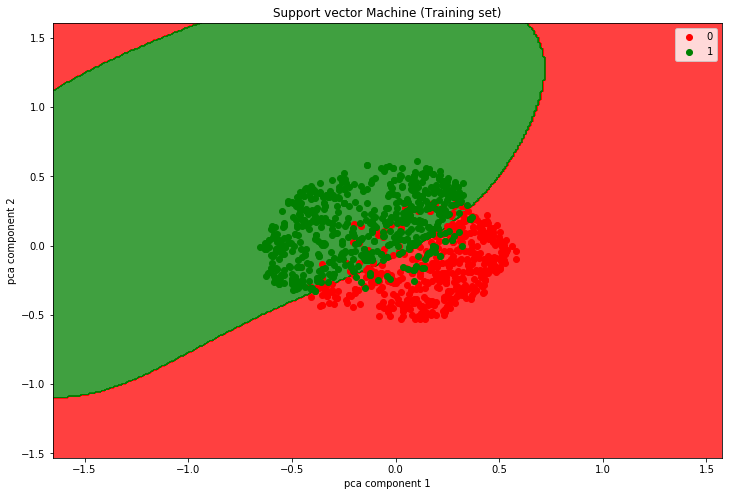

In [188]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (12 , 8))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, supportclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support vector Machine (Training set)')
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


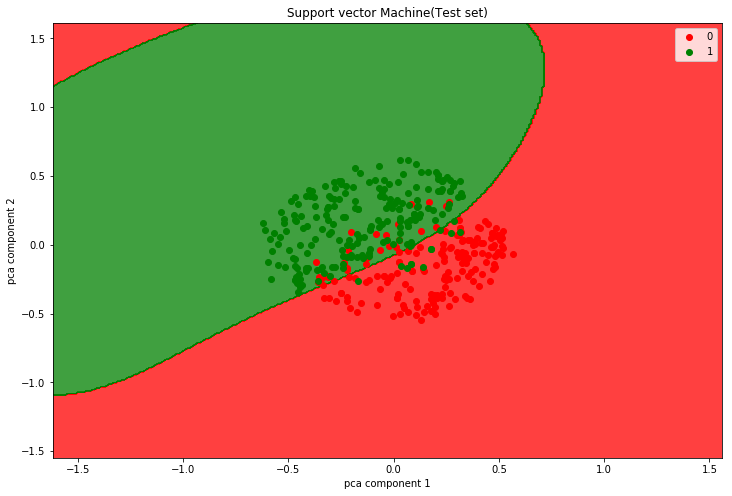

In [189]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (12 , 8))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, supportclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support vector Machine(Test set)')
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.legend()
plt.show()

 As we can see above that our model predict some of the green points as in the red region and some of the red points as in green region Because Any Model cannot predict 100% correct result 

## The Accuracy of the Support Vector Machine Model  is 89.65

#                                             Thankyou 